In [1]:
import pandas as pd
import numpy as np
path = r'C:\Users\VillardX\Desktop\law2019\预处理数据\whole1.0.xlsx'
data = pd.read_excel(path)

In [2]:
data.columns

Index(['庭审程序_是否_刑罚变更', '庭审程序_是否_一审', '庭审程序_是否_二审', '庭审程序_是否_复核', '庭审程序_是否_其他',
       '机动车交通事故责任纠纷', '物件损害责任纠纷', '侵权责任纠纷', '产品责任纠纷', '提供劳务者受害责任纠纷',
       '医疗损害责任纠纷', '地面施工、地下设施损害责任纠纷', '饲养动物损害责任纠纷', '产品销售者责任纠纷',
       '因申请诉中财产保全损害责任纠纷', '教育机构责任纠纷', '违反安全保障义务责任纠纷', '网络侵权责任纠纷',
       '因申请诉前财产保全损害责任纠纷', '物件脱落、坠落损害责任纠纷', '因申请诉中证据保全损害责任纠纷',
       '建筑物、构筑物倒塌损害责任纠纷', '提供劳务者致害责任纠纷', '产品生产者责任纠纷', '公共场所管理人责任纠纷',
       '公证损害责任纠纷', '用人单位责任纠纷', '触电人身损害责任纠纷', '义务帮工人受害责任纠纷', '高度危险活动损害责任纠纷',
       '噪声污染责任纠纷', '堆放物倒塌致害责任纠纷', '公共道路妨碍通行损害责任纠纷', '见义勇为人受害责任纠纷', '医疗产品责任纠纷',
       '监护人责任纠纷', '水上运输人身损害责任纠纷', '环境污染责任纠纷', '因申请先予执行损害责任纠纷', '铁路运输人身损害责任纠纷',
       '水污染责任纠纷', '林木折断损害责任纠纷', '侵害患者知情同意权责任纠纷', '群众性活动组织者责任纠纷', '土壤污染责任纠纷',
       '文书类型_是否_判决书', '文书类型_是否_裁定书', '第三人_有无自然人', '原告_是否_检察院', '原告_是否_法人',
       '原告_是否_自然人', '原告_是否_其他', '被告_是否_自然人', '被告_是否_法人', '被告_是否_其他',
       '庭审过程_是否撤诉_是', '庭审过程_是否撤诉_否', '庭审过程_是否撤诉_未知', '庭审过程_是否撤诉_汇总',
       '庭审过程_是否受伤_是', '庭审过程_是否受伤_否', '庭审过程_是否受伤_未知', '庭审过程_是否受伤_汇总

In [3]:
del data['庭审过程_是否拒不到庭_汇总']
del data['庭审过程_是否有异议_汇总']
del data['庭审过程_是否撤诉_汇总']
del data['庭审过程_是否受伤_汇总']
del data['庭审过程_是否涉及金钱_汇总']
del data['庭审过程_是否故意_汇总']
del data['庭审过程_是否要求精神赔偿_汇总']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.ix[:,:-1], data.ix[:,-1], test_size=0.2, random_state=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [5]:
from sklearn.ensemble import RandomForestClassifier

class_weight = dict({1:0.89, 0:0.11})
clf = RandomForestClassifier(n_estimators = 10,max_depth = 10,class_weight=class_weight,min_samples_split = 10)
#clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 0.89, 0: 0.11},
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [6]:
clf.score(X_test,y_test)

0.9665225866598864

In [7]:
#随机森林可视化
from sklearn.externals.six import StringIO
from sklearn import tree
import pydotplus


feature_name=list(X_train.columns)
target_name = [u'非终审',u'终审']
Estimators = clf.estimators_

for index, model in enumerate(Estimators):
    dot_data = StringIO()
    filename = 'rf_tree_' + str(index+1) + '.svg'#该格式可以显示中文
    tree.export_graphviz(model , out_file=dot_data,
                         feature_names=feature_name,
                         class_names=target_name,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_svg(filename)#改为svg输出


[10509  1290]
[[0.96793225 0.03206775]
 [0.04496124 0.95503876]]
[[0.968 0.032]
 [0.045 0.955]]


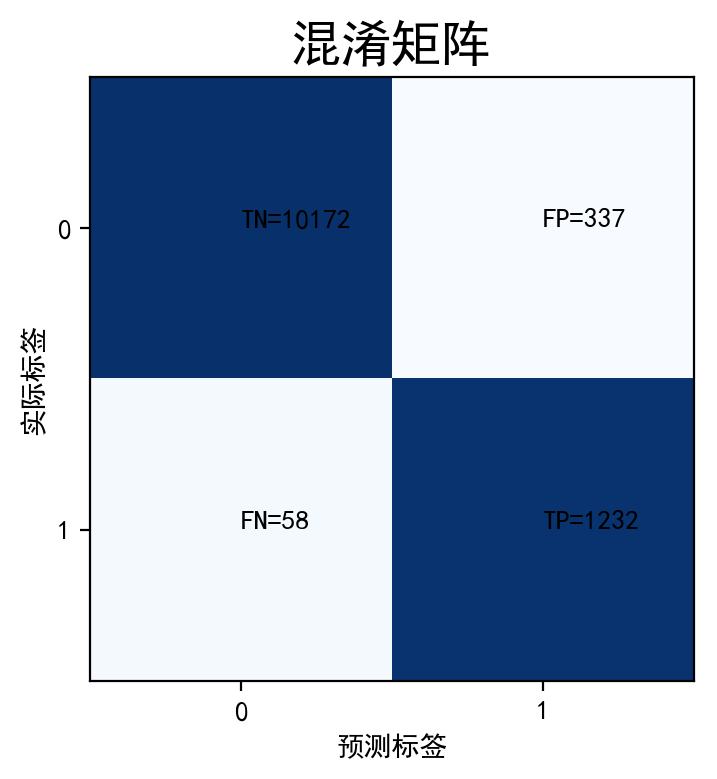

In [10]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

confusion = confusion_matrix(y_test,y_pred)
real = [0,1]#类别标签

row_nums=np.sum(confusion,axis=1)
print(row_nums)


#作混淆矩阵
plt.figure(dpi=200)
plt.imshow(error_matrix, cmap=plt.cm.Blues)
indices = range(len(error_matrix))

classes=real

plt.xticks(indices, classes)
plt.yticks(indices, classes)
#坐标轴含义
plt.xlabel(u'预测标签')
plt.ylabel(u'实际标签')
plt.title(u'混淆矩阵',fontsize=18)
# 显示数据，直观些
plt.text(0, 0, 'TN='+str(confusion[0][0]))
plt.text(0, 1, 'FN='+str(confusion[1][0]))
plt.text(1, 0, 'FP='+str(confusion[0][1]))
plt.text(1, 1, 'TP='+str(confusion[1][1]))

#显示
plt.show()

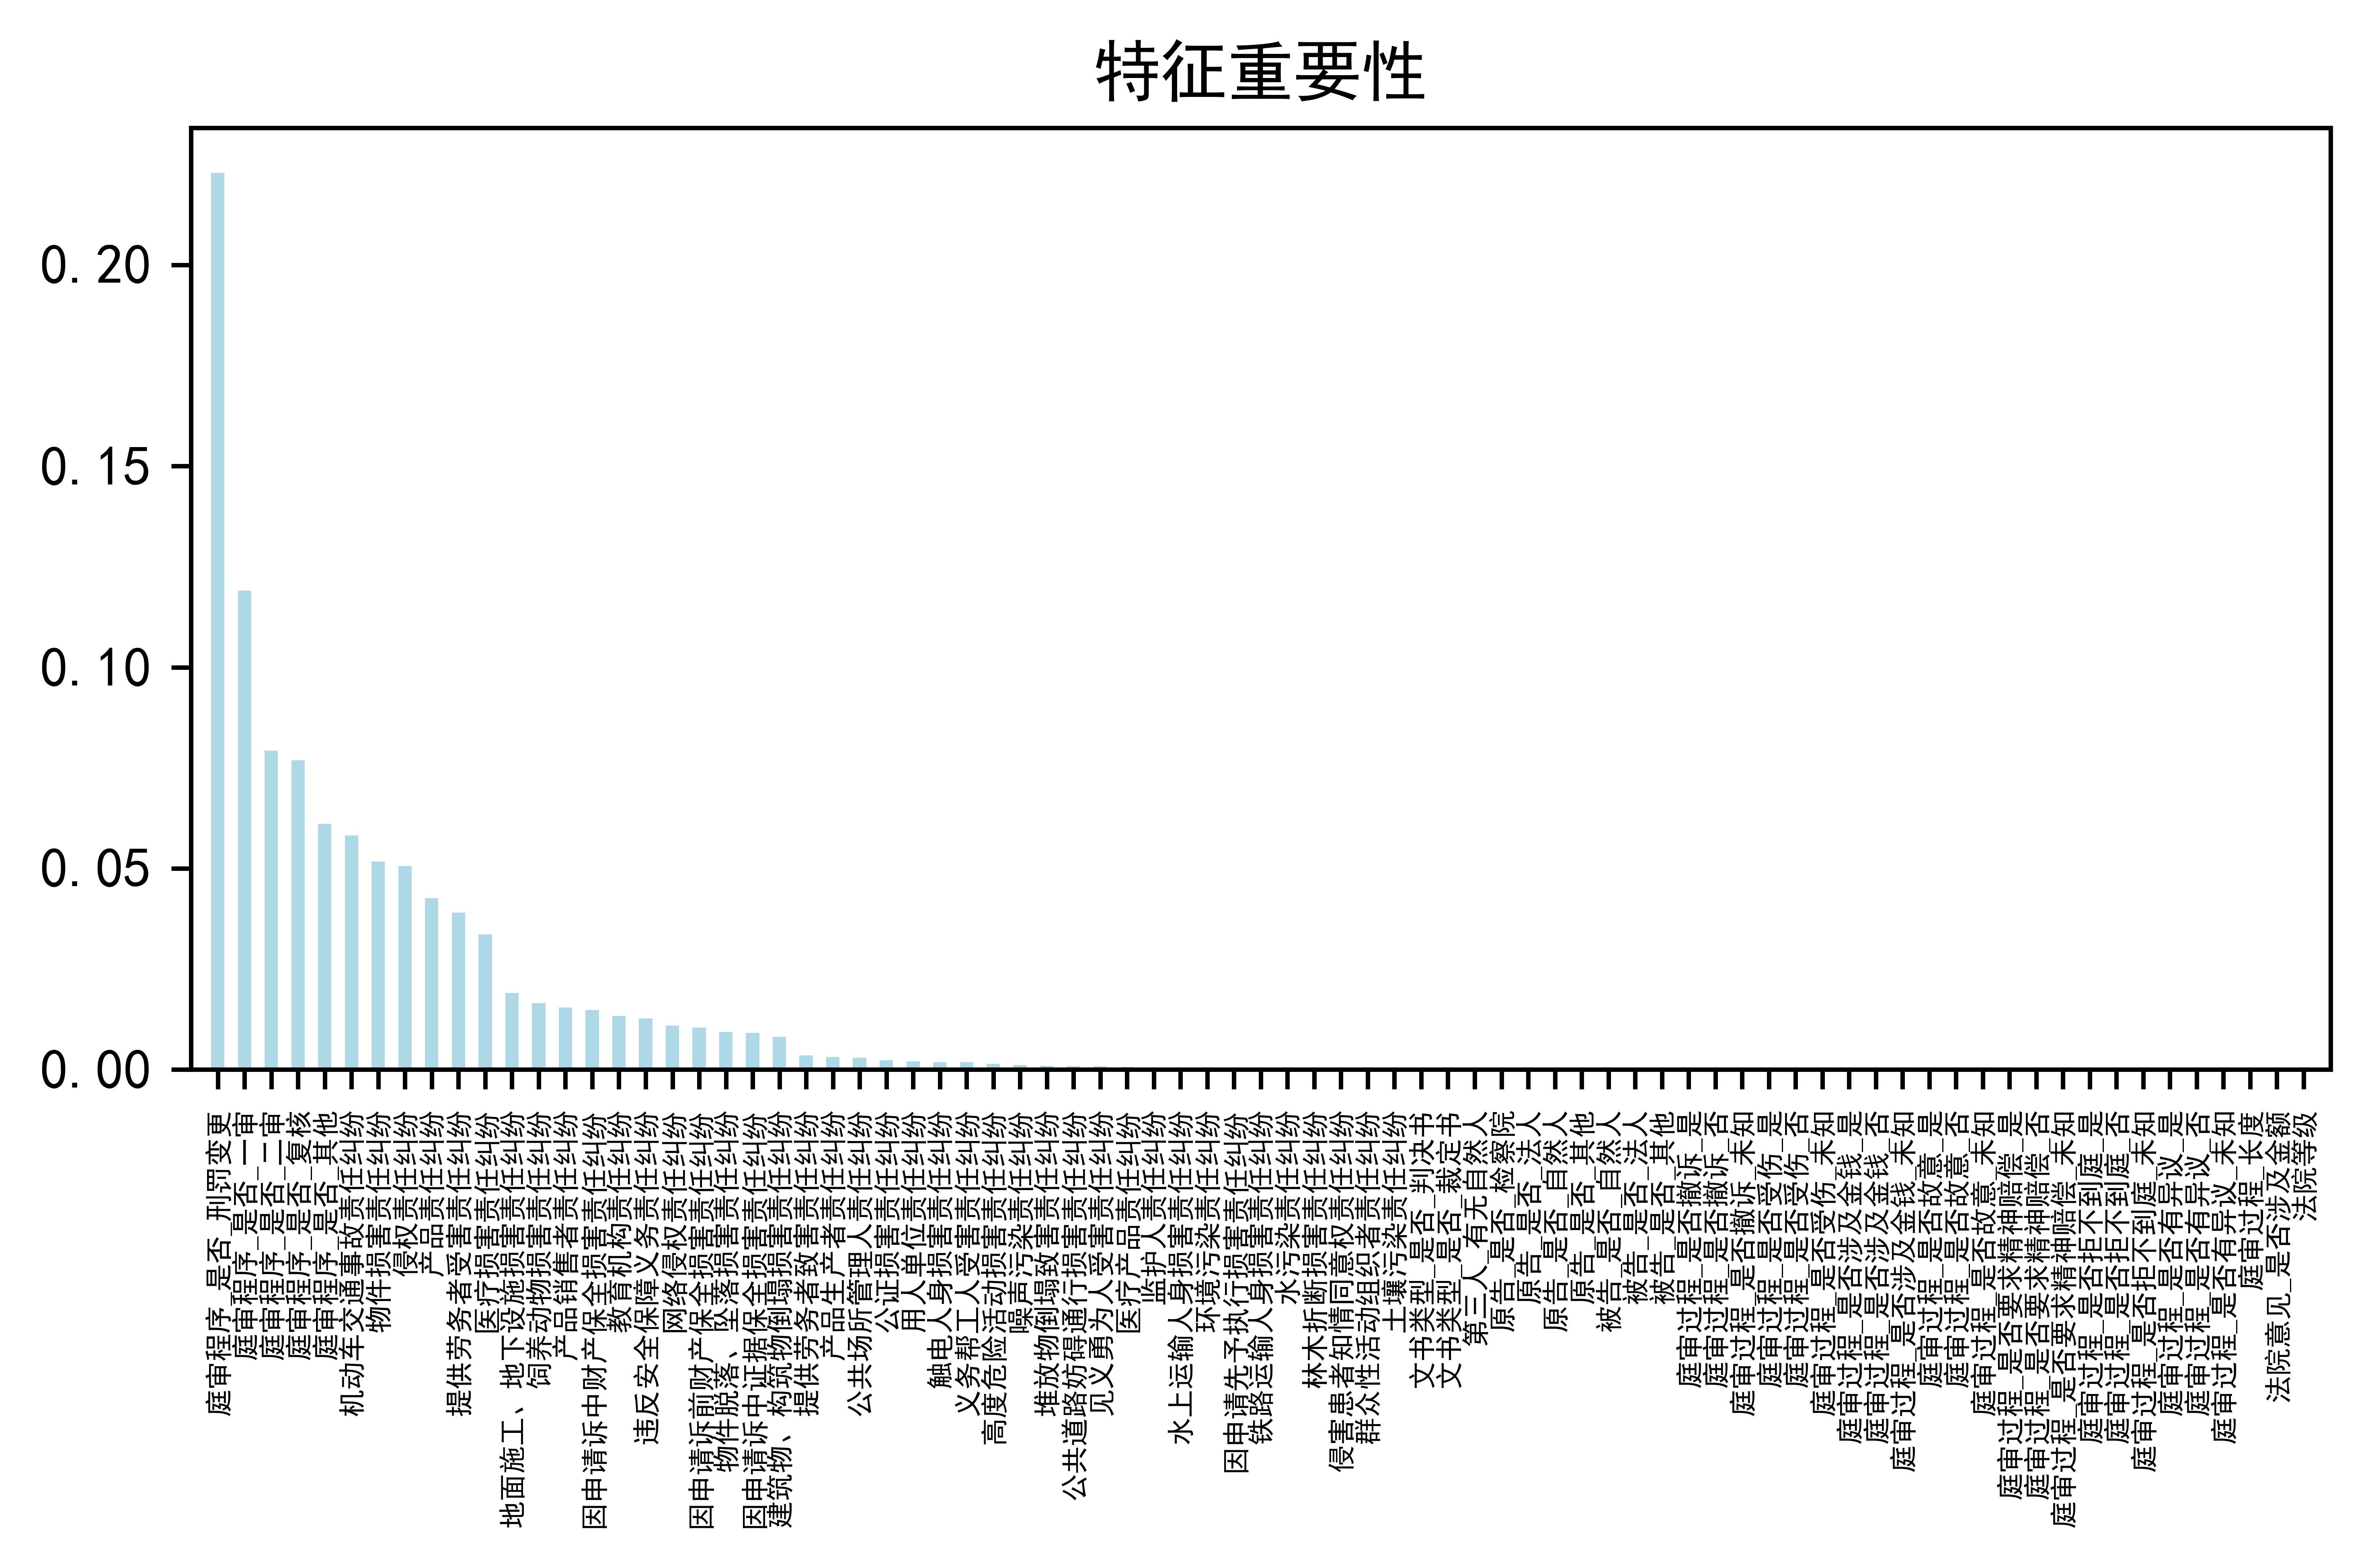

In [16]:
#特征重要性
feat_labels=data.columns[:-1]
importances=clf.feature_importances_
indices=np.argsort(importances)[::-1]

#排序输出特征重要性(可选)
#for f in range(X_train.shape[1]):
    #print ("%2d) %-*s %f" % (f+1,30,feat_labels[f],importances[indices[f]]) )

#作图
plt.figure(dpi=1000)
plt.title(u'特征重要性')
plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center',width=0.5)
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90,fontsize=5)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()


In [ ]:
a = pd.DataFrame(importances)
a.to_excel('重要性.xlsx')
b = pd.DataFrame(data.columns)
b.to_excel('特征.xlsx')